# Lesson6. Camera Calibration

## Types of Distortion

## Camera Calibration using Chessboard

### Finding corners

[[[140 128  34]
  [111  96  23]
  [138 121  88]
  ...
  [ 75  71  70]
  [ 34  29  28]
  [ 46  41  40]]

 [[113 100  21]
  [166 151  89]
  [196 178 153]
  ...
  [142 138 137]
  [ 97  92  91]
  [ 36  31  30]]

 [[142 127  78]
  [197 181 145]
  [199 182 173]
  ...
  [151 146 147]
  [140 136 135]
  [ 75  71  70]]

 ...

 [[116 114 120]
  [129 127 133]
  [133 131 137]
  ...
  [111 115 120]
  [102 106 111]
  [ 46  50  55]]

 [[110 108 114]
  [127 125 131]
  [132 130 136]
  ...
  [102 106 111]
  [ 66  70  75]
  [ 13  17  22]]

 [[151 149 155]
  [109 107 113]
  [113 111 117]
  ...
  [ 47  51  56]
  [ 13  17  22]
  [ 25  29  34]]]


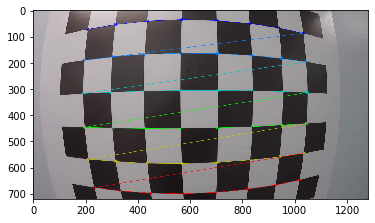

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# prepare object points
#TODO: enter the number of inside corners in x
nx = 8
#TODO: enter the number of inside corners in y
ny = 6

# Make a list of calibration images
fname = 'calibration_test.png'
img = cv2.imread(fname)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw corners
if ret == True:
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(img)

### Calibration

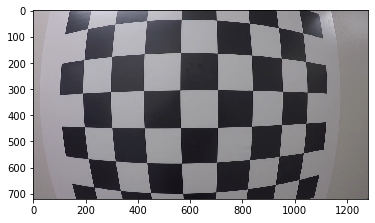

In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Read in a calibration image
img = mpimg.imread('calibration_test.png')
plt.imshow(img)

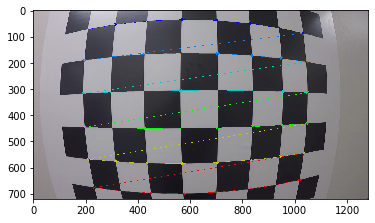

In [36]:
# Arrays to store object points and image points from all the images
objpoints = []     # 3D points in real world space
imgpoints = []     # 2D points in image plane

# Prepare object points, like (0, 0, 0), (1, 0, 0), (2, 0, 0), (7, 5, 0)
objp = np.zeros((6*8, 3), np.float32)
objp[:, :2] = np.mgrid[0:8, 0:6].T.reshape(-1, 2)     # x, y coordinates

# Convert the image to grayscale
gray = np.uint8(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) * 255)

# FInd the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (8, 6), None)

# if corners are found, add object points, image points
if ret == True:
    imgpoints.append(corners)
    objpoints.append(objp)
    
    # draw and display the corners
    img = cv2.drawChessboardCorners(img, (8, 6), corners, ret)
    plt.imshow(img)

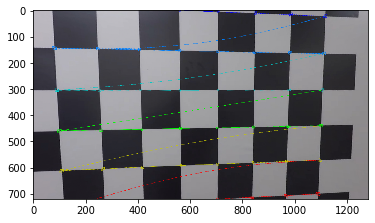

In [37]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
dst = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(dst)

### Camera Calibration with OpenCV

**Run the code in the cell below to extract object points and image points for camera calibration.**

In [39]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib qt

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8, 0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('calibration_wide/GO*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (8,6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (8,6), corners, ret)
        #write_name = 'corners_found'+str(idx)+'.jpg'
        #cv2.imwrite(write_name, img)
        cv2.imshow('img', img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

### If the above cell ran sucessfully, you should now have `objpoints` and `imgpoints` needed for camera
### calibration.  Run the cell below to calibrate, calculate distortion coefficients, and test undistortion on an image!

Text(0.5, 1.0, 'Undistorted Image')

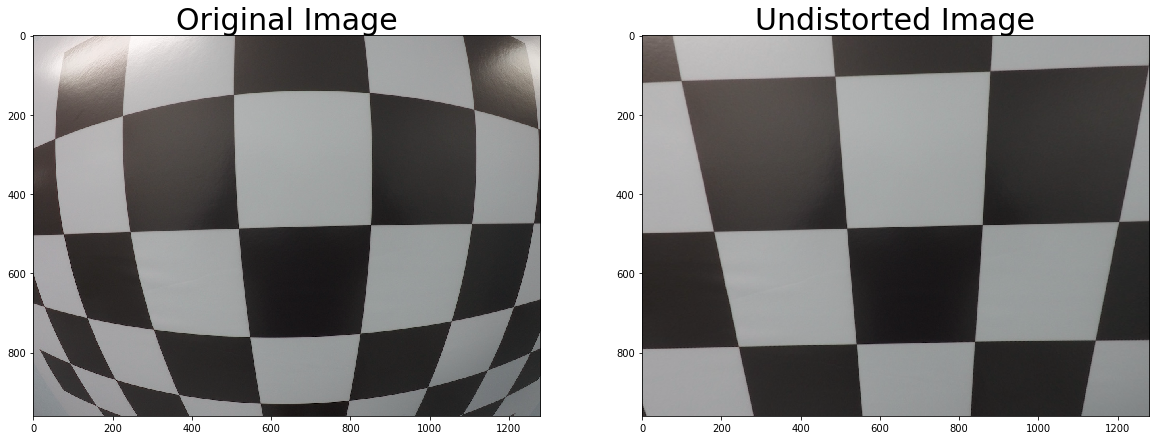

In [40]:
import pickle
%matplotlib inline

# Test undistortion on an image
img = cv2.imread('calibration_wide/test_image.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)


dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('calibration_wide/test_undist.jpg',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "calibration_wide/wide_dist_pickle.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)